# Midterm Exam March 2022

<font size="3">Lukas Pechacek</font>

<font size="3">student ID: 11954922</font>

<font size="3">15/03/2022</font>

<font size="3">Big Data and Automated Content Analysis</font>

Importing necessary packages

In [1]:
import json
import urllib
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import state_union
from sklearn.datasets import fetch_20newsgroups

import requests
import openpyxl as xls


import json
import csv
from pprint import pprint
from pandas import json_normalize
import time

import matplotlib.pyplot as plt
import seaborn as sns




The aim is to create a program that identifies the address of containers, whether they are active or not and what type of containters they are by the container id provided by the API. As such, it seems reasonale to use the container API. This way, data can be extracted that shows which containers are not active and identify their addresses. Assuming 0 means inactive and 1 means active, we can pass this data on to the city, which can then activate those containters that are currently not active. 





The base API will be the Amsterdam waste collection API. By seperating the endpoint we retain the possibility of potentially selecting another API endpoint, such as wells, for later analyses. 

In [2]:
baseurl = 'https://api.data.amsterdam.nl/afval/v1/'

In [3]:
endpoint = 'containers'

Requesting the data from the API using the requests package and saving it as 'data' in json format.

In [4]:
r = requests.get(baseurl + endpoint)

In [5]:
data = r.json()

Using the 'pprint' method from the imported package to get a better overlook over the keys and values within the API.

In [6]:
pprint(data)

{'_links': {'next': {'href': 'https://api.data.amsterdam.nl/afval/v1/containers/?page=2'},
            'previous': {'href': None},
            'self': {'href': 'https://api.data.amsterdam.nl/afval/v1/containers/'}},
 'count': 23138,
 'results': [{'_display': 'Container object (2830)',
              '_links': {'self': {'href': 'https://api.data.amsterdam.nl/afval/v1/containers/2830/'}},
              'active': 0,
              'address': 'Jan Evertsenstraat 717, Amsterdam',
              'container_type': {'id': 27,
                                 'name': 'Nieuw-West (SV)  Rest 5m3 TR Opl '
                                         'inst',
                                 'volume': 5.0,
                                 'weight': 700},
              'id': 2830,
              'id_number': 'REF31242',
              'operational_date': '2008-08-02T00:00:00Z',
              'owner': {'id': 184, 'name': 'Amsterdam Dump Locatie'},
              'placing_date': '2008-08-02T00:00:00Z',
         

In [7]:
pages = (data['_links']['next']['href'])

In [8]:
print(pages)

https://api.data.amsterdam.nl/afval/v1/containers/?page=2


Defining variables from the API that we want to work with: container ID (con_id), whether the container is active or not (active), the address of the container (address) and the name of the waste that goes into the container (waste_name)

In [9]:
con_id = (data['results'][0]['id'])
active = (data['results'][0]['active'])
address = (data['results'][0]['address'])
waste_name = (data['results'][0]['waste_name'])

In [10]:
pprint(data.keys())

dict_keys(['_links', 'count', 'results'])


The results keys seems to hold most of the information needed for futher analysis. Therefore this key is printed in the pprint format. 

In [11]:
pprint(data['results'])

[{'_display': 'Container object (2830)',
  '_links': {'self': {'href': 'https://api.data.amsterdam.nl/afval/v1/containers/2830/'}},
  'active': 0,
  'address': 'Jan Evertsenstraat 717, Amsterdam',
  'container_type': {'id': 27,
                     'name': 'Nieuw-West (SV)  Rest 5m3 TR Opl inst',
                     'volume': 5.0,
                     'weight': 700},
  'id': 2830,
  'id_number': 'REF31242',
  'operational_date': '2008-08-02T00:00:00Z',
  'owner': {'id': 184, 'name': 'Amsterdam Dump Locatie'},
  'placing_date': '2008-08-02T00:00:00Z',
  'warranty_date': '2005-12-31T00:00:00Z',
  'waste_name': 'Rest',
  'waste_type': 1,
  'well': 'https://api.data.amsterdam.nl/afval/v1/wells/2829/'},
 {'_display': 'Container object (2860)',
  '_links': {'self': {'href': 'https://api.data.amsterdam.nl/afval/v1/containers/2860/'}},
  'active': 0,
  'address': 'Burgemeester Eliasstraat 43-2, 1063EW, Amsterdam',
  'container_type': {'id': 27,
                     'name': 'Nieuw-West (SV)  R

Printing the length of the data on the first page in the results key. We get 20 cases (containers) per page. 

In [12]:
print(len(data['results']))

20


Writing a function to which the base url, the endpoint url and a number defined as 'x'. Inside the function we then specify the number to the last part of the url '?page=' and parse in the number we defined in the function, making it into an f string so it can be added alltogether. 

In [13]:
def main_request(baseurl, endpoint, x):
    r = requests.get(baseurl + endpoint + f'?page={x}')
    return r.json()


Our API data is then defined by the request function. Currently the function will return the 1st page of the API data, if we want a different page, we are able to change the 'x' to a different page number.

In [14]:
data = main_request(baseurl, endpoint, 1)

Writing a function that will request the data from the API that we are interested in. We parse in the variables of interest, i.e. id, address, waste name and whether the container is active and create a loop that loops through all of the data in the results key to get this information, as the defined variables were only identified from the first item of the list. The variables are also defined with new keys, which are nested into a dictionary. This dictionary is then appended into an empty list, 'contlist', that will extract the information from the API. When the function is printed then keys that were assigned and and the values are now inside the function 'parse_json'.

In [15]:
def parse_json(response):
    contlist = []
    for item in response ['results']:
        condic = {
            'con_id': item['id'],
            'address': item['address'],
            'waste_name': item['waste_name'],
            'active': item['active']
        }
        
        contlist.append(condic)
    return contlist

print(parse_json(data))

[{'con_id': 2830, 'address': 'Jan Evertsenstraat 717, Amsterdam', 'waste_name': 'Rest', 'active': 0}, {'con_id': 2860, 'address': 'Burgemeester Eliasstraat 43-2, 1063EW, Amsterdam', 'waste_name': 'Rest', 'active': 0}, {'con_id': 3494, 'address': 'Uffizilaan 11, Amsterdam', 'waste_name': 'Rest', 'active': 0}, {'con_id': 3560, 'address': 'Guggenheimlaan 59, Amsterdam', 'waste_name': 'Rest', 'active': 0}, {'con_id': 3566, 'address': 'Mezquitalaan 43, Amsterdam', 'waste_name': 'Papier', 'active': 0}, {'con_id': 3568, 'address': 'Mezquitalaan 43, Amsterdam', 'waste_name': 'Rest', 'active': 0}, {'con_id': 3610, 'address': 'Ossstraat hoek Eastonstraat, 1068 Amsterdam, Nederland', 'waste_name': 'Rest', 'active': 0}, {'con_id': 3792, 'address': 'Burgemeester Eliasstraat 43-1, 1063EW, Amsterdam', 'waste_name': 'Rest', 'active': 0}, {'con_id': 3844, 'address': 'Reimerswaalstraat 61-77, 1069 AG Amsterdam, Nederland', 'waste_name': 'Papier', 'active': 0}, {'con_id': 3882, 'address': 'Ottho Heldring

Normalizing the function to flatten the data that containes our list with our dictionary keys and values to get a clearer overview of the data.

In [16]:
json_normalize(parse_json(data))

,con_id,address,waste_name,active
0,2830,"Jan Evertsenstraat 717, Amsterdam",Rest,0
1,2860,"Burgemeester Eliasstraat 43-2, 1063EW, Amsterdam",Rest,0
2,3494,"Uffizilaan 11, Amsterdam",Rest,0
3,3560,"Guggenheimlaan 59, Amsterdam",Rest,0
4,3566,"Mezquitalaan 43, Amsterdam",Papier,0
5,3568,"Mezquitalaan 43, Amsterdam",Rest,0
6,3610,"Ossstraat hoek Eastonstraat, 1068 Amsterdam, N...",Rest,0
7,3792,"Burgemeester Eliasstraat 43-1, 1063EW, Amsterdam",Rest,0
8,3844,"Reimerswaalstraat 61-77, 1069 AG Amsterdam, Ne...",Papier,0
9,3882,"Ottho Heldringstraat 37A, 1066XT, Amsterdam",Rest,0


Code retrieving a selected range of pages of the container API. This code was discovered and adapted accordingly from Stackoverflow. I do not claim this code as my own. Source: https://stackoverflow.com/questions/56206038/how-to-loop-through-paginated-api-using-python

An empty list is created. The correct API is then retrieved and the correct key is identified. A loop is then created stating that we want to retrieve pages in the range from '2' until '25'. By supplying the page key as an f-string we indicate that we want each url within the specified range in json format and interting the page inside the curly brackets.

In [17]:
container_url = 'https://api.data.amsterdam.nl/afval/v1/containers/?page=1'

pages_list = []

container_api = requests.get(container_url).json()
multiple_pages = container_api ['results']
for page in range(2, 25):
    container_api = requests.get(container_url + f"&page={page}").json()
    pages_list.extend(container_api['results'])

In [18]:
pprint(pages_list)

[{'_display': 'Container object (4754)',
  '_links': {'self': {'href': 'https://api.data.amsterdam.nl/afval/v1/containers/4754/'}},
  'active': 0,
  'address': 'Parmenidesstraat 20, Amsterdam / Plutarchusstraat',
  'container_type': {'id': 27,
                     'name': 'Nieuw-West (SV)  Rest 5m3 TR Opl inst',
                     'volume': 5.0,
                     'weight': 700},
  'id': 4754,
  'id_number': 'REF88577',
  'operational_date': '2006-01-25T00:00:00Z',
  'owner': {'id': 184, 'name': 'Amsterdam Dump Locatie'},
  'placing_date': '2006-01-25T00:00:00Z',
  'warranty_date': '2007-01-25T00:00:00Z',
  'waste_name': 'Rest',
  'waste_type': 1,
  'well': 'https://api.data.amsterdam.nl/afval/v1/wells/26062/'},
 {'_display': 'Container object (4756)',
  '_links': {'self': {'href': 'https://api.data.amsterdam.nl/afval/v1/containers/4756/'}},
  'active': 0,
  'address': 'Socratesstraat 31 / Parmenidesstraat',
  'container_type': {'id': 27,
                     'name': 'Nieuw-West (S

In [19]:
print(pages_list[0]['address'])

Parmenidesstraat 20, Amsterdam / Plutarchusstraat


Printing length of the new list to see if loop worked

In [20]:
print(len(pages_list))

460


Due to the goal of analyzing the number of containers per which type of container they represent and whether said containers are active or not, it seems plausible to convert the data into a dateframe for further statistical analysis. A dataframe is also better served for viual inspection. The rows will be the cases while the columns will serve as variables. 

In [21]:
containerDF = pd.DataFrame(pages_list)

In [22]:
containerDF.head()

,_links,_display,id,id_number,owner,active,waste_type,waste_name,container_type,warranty_date,operational_date,placing_date,well,address
0,{'self': {'href': 'https://api.data.amsterdam....,Container object (4754),4754,REF88577,"{'id': 184, 'name': 'Amsterdam Dump Locatie'}",0,1,Rest,"{'id': 27, 'name': 'Nieuw-West (SV) Rest 5m3 ...",2007-01-25T00:00:00Z,2006-01-25T00:00:00Z,2006-01-25T00:00:00Z,https://api.data.amsterdam.nl/afval/v1/wells/2...,"Parmenidesstraat 20, Amsterdam / Plutarchusstraat"
1,{'self': {'href': 'https://api.data.amsterdam....,Container object (4756),4756,REF88579,"{'id': 184, 'name': 'Amsterdam Dump Locatie'}",0,1,Rest,"{'id': 27, 'name': 'Nieuw-West (SV) Rest 5m3 ...",2007-01-25T00:00:00Z,2007-01-25T00:00:00Z,2007-01-25T00:00:00Z,https://api.data.amsterdam.nl/afval/v1/wells/2...,Socratesstraat 31 / Parmenidesstraat
2,{'self': {'href': 'https://api.data.amsterdam....,Container object (4762),4762,REF31488,"{'id': 184, 'name': 'Amsterdam Dump Locatie'}",0,1,Rest,"{'id': 27, 'name': 'Nieuw-West (SV) Rest 5m3 ...",2015-06-11T00:00:00Z,2007-06-11T00:00:00Z,2007-06-11T00:00:00Z,None,None
3,{'self': {'href': 'https://api.data.amsterdam....,Container object (4764),4764,114681,"{'id': 184, 'name': 'Amsterdam Dump Locatie'}",0,6,Papier,"{'id': 204, 'name': 'Nieuw-West papier 5m3 KH ...",2015-06-12T00:00:00Z,2015-06-12T00:00:00Z,2015-06-12T00:00:00Z,None,None
4,{'self': {'href': 'https://api.data.amsterdam....,Container object (4780),4780,GLF60300,"{'id': 184, 'name': 'Amsterdam Dump Locatie'}",0,2,Glas,"{'id': 109, 'name': 'nieuw-West Glas 1 4m3 KH ...",2015-06-16T00:00:00Z,2007-12-31T00:00:00Z,2007-12-31T00:00:00Z,https://api.data.amsterdam.nl/afval/v1/wells/4...,"Van Mourik Broekmanstraat 103, Amsterdam"


Selecting columns to be retianed for the final data frame: Address, id, active, waste_name. Other variables are not deemed necessary for the goal of this analysis.

In [23]:
FinalDF = containerDF[['id', 'active', 'waste_name', 'address']]

printing final dataframe

In [24]:
FinalDF

,id,active,waste_name,address
0,4754,0,Rest,"Parmenidesstraat 20, Amsterdam / Plutarchusstraat"
1,4756,0,Rest,Socratesstraat 31 / Parmenidesstraat
2,4762,0,Rest,None
3,4764,0,Papier,None
4,4780,0,Glas,"Van Mourik Broekmanstraat 103, Amsterdam"
...,...,...,...,...
455,8232,0,Rest,"Riouwstraat 88, 1094XX, Amsterdam"
456,8234,0,Rest,"Riouwstraat 2, 1094XP, Amsterdam"
457,8236,0,Rest,"Riouwstraat 2, 1094XP, Amsterdam"
458,8238,0,Rest,"Riouwstraat 2, Amsterdam, Nederland"


# Statistical Analyses

The statistical analyses show that in the retrieved data there are 365 containers of the rest type of waste containers, 52 paper waste containers, 42 glas containers and 1 textile container.

In [25]:
FinalDF['waste_name'].value_counts()

Rest       365
Papier      52
Glas        42
Textiel      1
Name: waste_name, dtype: int64

Analyses also shows that the top containers are 'Rest'

In [26]:
FinalDF['waste_name'].describe()

count      460
unique       4
top       Rest
freq       365
Name: waste_name, dtype: object

Out of the 460 containers in the retrieved data, 435 are labelled as 0, while only 25 are labelled as 1, indicating that the majority of the retrieved API pages are inactive containers.

In [27]:
FinalDF['active'].value_counts()

0    435
1     25
Name: active, dtype: int64

Analysis showing that there 6 addresses missing.

In [28]:
FinalDF.isna().sum()

id            0
active        0
waste_name    0
address       6
dtype: int64

Using the grouby method it is also clear that from the retrieved API pages most of the active as well as inactive containers are of the rest type of waste category.

In [29]:
FinalDF.groupby(['active'])['waste_name'].describe()


,count,unique,top,freq
active,,,,
0,435,4,Rest,347
1,25,3,Rest,18


# Graphical Analyses

Bar chart visualizing the rest type of waste category are the clearly most present container category in the retrieved API data.

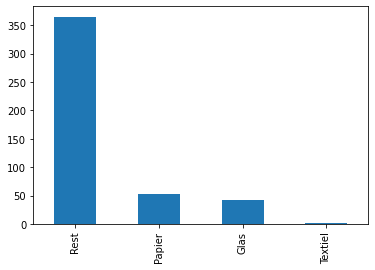

In [30]:
FinalDF['waste_name'].value_counts().plot(kind='bar')
plt.show()  

Pie chart indicating the most represented container category in the retrieved API data: rest.

<function matplotlib.pyplot.show(close=None, block=None)>

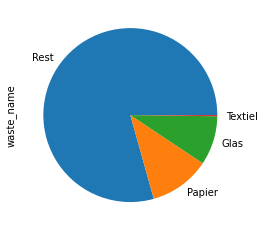

In [31]:
FinalDF['waste_name'].value_counts().plot(kind='pie')
plt.show

Countplot visualizing the active versus inactive containers in Amsterdam.

<AxesSubplot:xlabel='active', ylabel='count'>

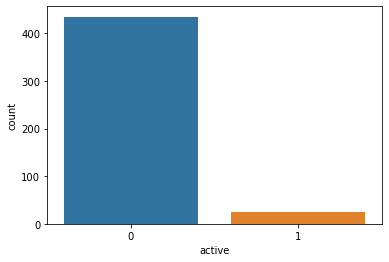

In [32]:
sns.countplot(x='active', data=FinalDF)

Pie chart visualizing the active versus inactive containers in Amsterdam.

<function matplotlib.pyplot.show(close=None, block=None)>

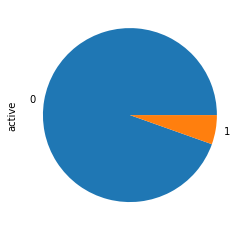

In [33]:
FinalDF['active'].value_counts().plot(kind='pie')
plt.show

# Exporting the data

Exporting the pandas dataframe to a csv format without indexes

In [34]:
FinalDF.to_csv('ContainerDataframe.csv', index=False)

Exporting the pandas dataframe to json format using the index information without indenting.

In [35]:
FinalDF.to_json('ContainerDataframe.json', lines=False, index=True, indent=None)

Exporting dataframe to html format, indicating the encoding and that the exported format will not be used as a notebook

In [36]:
FinalDF.to_html('ContainerDataframe.html', index=True, encoding = 'utf-8', notebook=False)

Exporting dataframe to Excel format

In [37]:
FinalDFExcel = pd.ExcelWriter('ContainerDataframe.xlsx', engine='xlsxwriter')

In [38]:
FinalDF.to_excel(FinalDFExcel)

Saving the excel file

In [39]:
FinalDFExcel.save()